# Classification of iris flowers using a linear classifier

Classification is an important technique in data analysis. For example, one would like to develop a model to classify hand-written characters into one of the alphabets in a language. There are a number of methods for such problems, each can be tailored to the dataset at hand and degree of robustness necessary.

To begin with, we will apply the classification algorithm on the entire dataset, i.e., without paritioning the data into training and test sets. 

## Two-variables classification using sepal length and sepal width

### Let's visualize the iris dataset as a map in these two variables.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

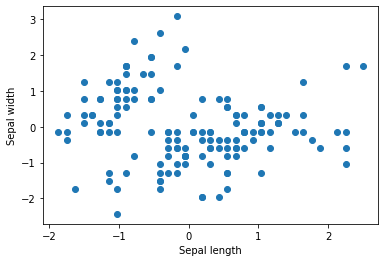

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x_iris[:,0],x_iris[:,1])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

As done in DS_03, we can color code each flower.

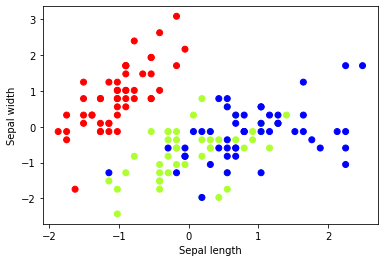

In [3]:
import matplotlib.pyplot as plt

# Get color for each entry of data 
N_data=iris.data.shape[0]

colors=list()
palette={0:'red',1:'greenyellow',2:'blue'} 

for i_data in range(N_data):
    i_color=int(iris.target[i_data])
    colors.append(palette[i_color])

# Plot again    
plt.scatter(x_iris[:,0],x_iris[:,1],c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

You can further improve this plot, by adding the legend to each color. To do that, you have to make the scatterplot point-by-point.

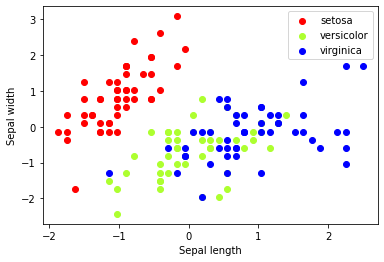

In [4]:
import matplotlib.pyplot as plt
colors_list=['red','greenyellow','blue']
for i in range(len(colors_list)):
    xs=x_iris[:,0][y_iris==i]
    ys=x_iris[:,1][y_iris==i]
    plt.scatter(xs,ys,c=colors_list[i])
plt.figaspect(1.0)
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Linear classification using stochastic gradient descent

In this method, classification is done by separating each species from the rest by _hyperplanes_ in the _feature space_. In the 2D space, the hyperplanes are straight lines. 

In [5]:
from sklearn.linear_model import SGDClassifier

# The classification model is stochastic gradient classifier
clf_model=SGDClassifier()

# We will use sepal length/width as features
features=x_iris[:,0:2]

# Label needed for classification are 0,1,2
label=y_iris

# Fit
clf_model.fit(features, label)

# Coefficients and intercepts to define the hyperplane
coeffs=clf_model.coef_
intercept=clf_model.intercept_

### Visualize the hyerplanes

Since we have three labels, we will have three hyperplanes each defined in terms of coefficients and intercepts. 

In [6]:
print(coeffs)

[[-24.51802847  14.34546208]
 [  3.16125227  -3.12378374]
 [  3.4901931    1.1051213 ]]


In [7]:
print(intercept)

[-15.17363757  -5.96028247  -3.3026766 ]


The first hyperplane is defined by the equation $i_1 + c_{11} x_1 + c_{12} x_2=0 \Rightarrow x_2 = -i_1/c_{12} - c_{11}/c_{12} x_1=(-i_1-c_{11}x_1)/c_{12}$, which is an equation of a straight line. 

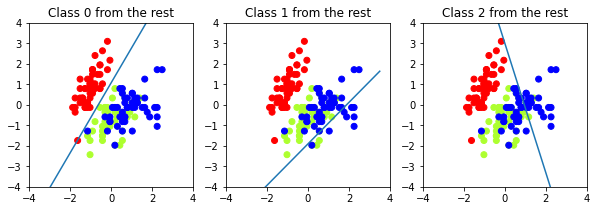

In [8]:
x1_min, x1_max = -4, 4
x2_min, x2_max = -4, 4

xs = np.arange(x1_min, x1_max, 0.5)

fig, axes = plt.subplots(1,3,figsize=(10,10))

for i in [0, 1, 2]:
    axes[i].set_aspect(1.0)
    axes[i].set_title('Class '+str(i)+' from the rest')
    axes[i].set_xlim(x1_min, x1_max)
    axes[i].set_ylim(x2_min, x2_max)
    axes[i].scatter(features[:,0], features[:,1], c=colors)
    ys=(-intercept[i]-xs*coeffs[i,0])/coeffs[i,1]
    axes[i].plot(xs,ys)

From the plots it appears as if we can separate (i.e. classify) the class-0 from the other classes with a  straight line in the plane splanned by sepal length and sepal width.

In [9]:
from sklearn import metrics

# predict y using the features
y_pred=clf_model.predict(features)

In [10]:
print(metrics.classification_report(y_pred,y_iris))

# Try
# print(metrics.classification_report(y_pred,y_iris,target_names=iris.target_names))
# Try
# print(metrics.classification_report(y_pred,y_iris),labels=np.unique(y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.42      0.68      0.52        31
           2       0.78      0.58      0.67        67

    accuracy                           0.73       150
   macro avg       0.73      0.74      0.72       150
weighted avg       0.78      0.73      0.74       150



In [11]:
print(metrics.accuracy_score(y_pred,label))

0.7333333333333333


If you are interested in seeing whether during prediction, you have assigned a class which not at all present in the original list of labels, you can try the following.

In [12]:
set(y_iris) - set(y_pred)

set()

## Using all four features

In [13]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

clf_model=SGDClassifier()
clf_model.fit(x_iris, y_iris)

y_pred=clf_model.predict(x_iris)

print(metrics.classification_report(y_pred,y_iris,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      1.00      0.96        46
   virginica       1.00      0.93      0.96        54

    accuracy                           0.97       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.98      0.97      0.97       150



It is not possible to visualize the hyperplanes in the 4D feature space that separate the different classes. The quantity `precision` is a good measure of the prediction accuracy. The overall score can calculated as follows: 

In [14]:
print(metrics.accuracy_score(y_pred,label))

0.9733333333333334


## Training and Testing

Remember, the data analytics tehcniques that we have been discussing have become so popular because, these models once trained over a selected set of data are applicable to perform the same task in a new data. Further, these models also improve their performance as more and more data are used for re-training them. Hence, we say that these models learn and also denote these methods as machine learning methods. Here, the term _machine_ stands for the algorithm and not your computer as it is sometimes mis-interpreted.  

To demonstrate this approach, let's divide the iris dataset into training and test sets using an 80/20 split. 

In [15]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.2, random_state=0)

clf_model=SGDClassifier()
clf_model.fit(x_train, y_train)

y_pred=clf_model.predict(x_test)

print(metrics.classification_report(y_pred,y_test,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.93      0.96        14
   virginica       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [16]:
print(metrics.accuracy_score(y_pred,y_test))

0.9666666666666667


Overall, what we have done so far is to develop a classification model using 80% of the iris dataset and applied the same model (i.e. coefficients and intercepts) to predict the labels of the remaining 20% of the dataset. When we compare `y_pred` against the actual labels of the test set collected in `y_test`, we have gotten a very good score of > 0.95.